In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%H:%M:%S',
                    level=logging.DEBUG)

from Main import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data = Data()
cal = Calibration(data)
thr = BinaryThreshold(data)
per = PerspectiveTransform(data)
nextLanes = NextFindLanes(data)
lanes = FindLanes(data)
smooth = ExponentialSmoothing(data, decay=.85)
curve = Curvature(data)
off = LaneOffset(data)
decorate = DecorateWithData(data)

07:45:39 INFO loaded calibration data


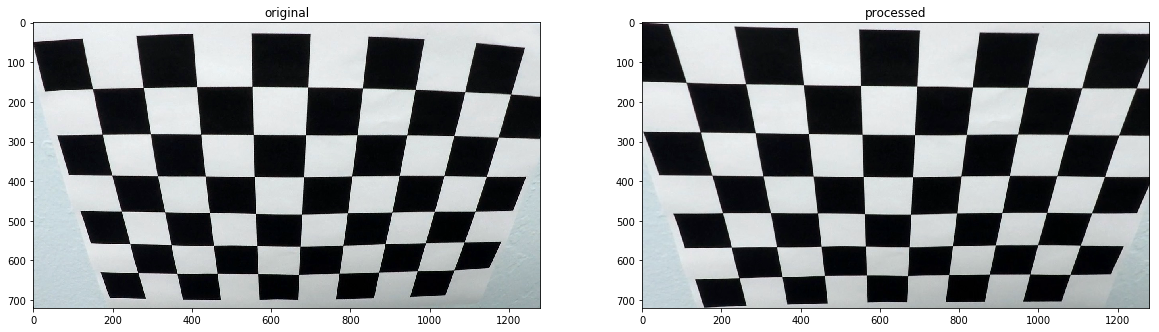

In [18]:
for f in glob.glob('./camera_cal/calibration2.jpg'):
    img = cv2.imread(f)
    cal.show(img)
    break

08:02:16 DEBUG Advanced lane finding initializing


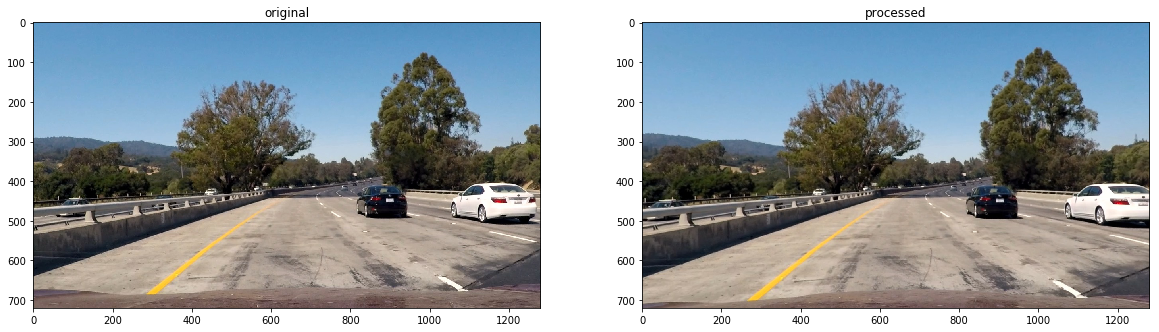

In [24]:
for f in glob.glob('./test_images/test1.jpg'):
    img = cv2.imread(f)
    cal.show(img)
    break

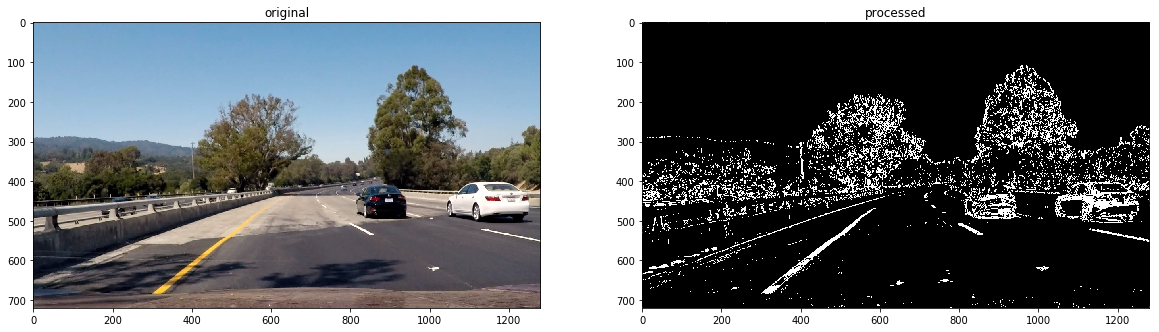

In [26]:
for f in glob.glob('test_images/test4.jpg'):
    img = cv2.imread(f)
    thr.show(img)
    break

08:15:23 DEBUG Advanced lane finding initializing


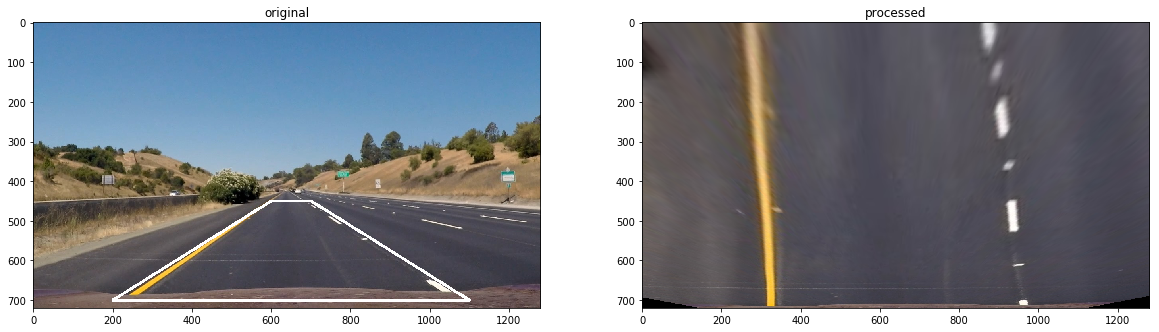

In [39]:
for f in glob.glob('test_images/straight_lines1.jpg'):
    img = cv2.imread(f)
    per.show(img)
    break

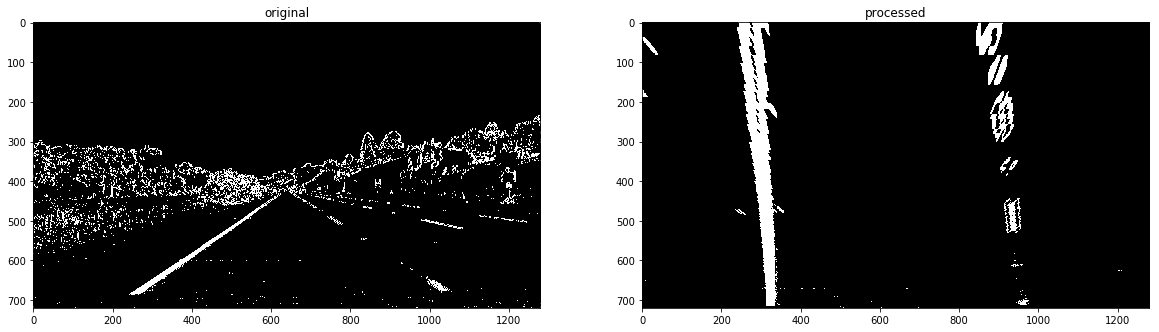

In [40]:
for f in glob.glob('test_images/*.jpg'):
    img = cv2.imread(f)
    img = thr.process(img)
    per.show(img)
    break

In [44]:
3*4

12

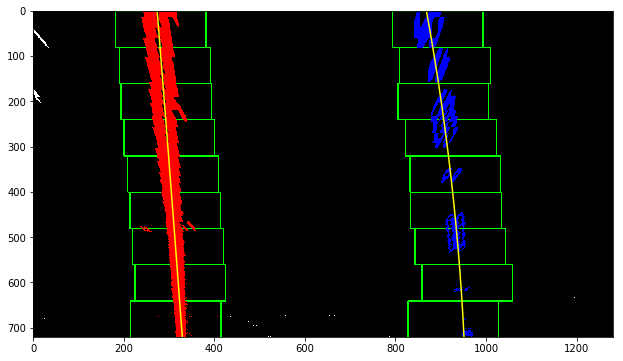

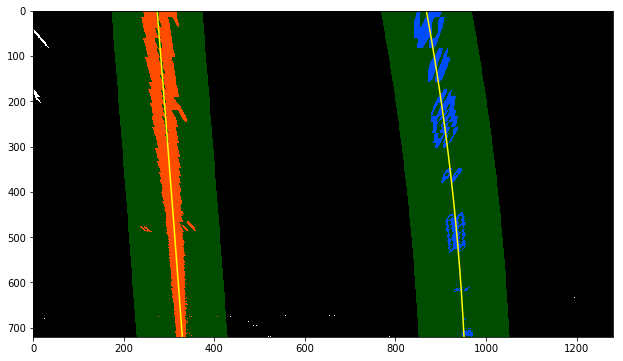

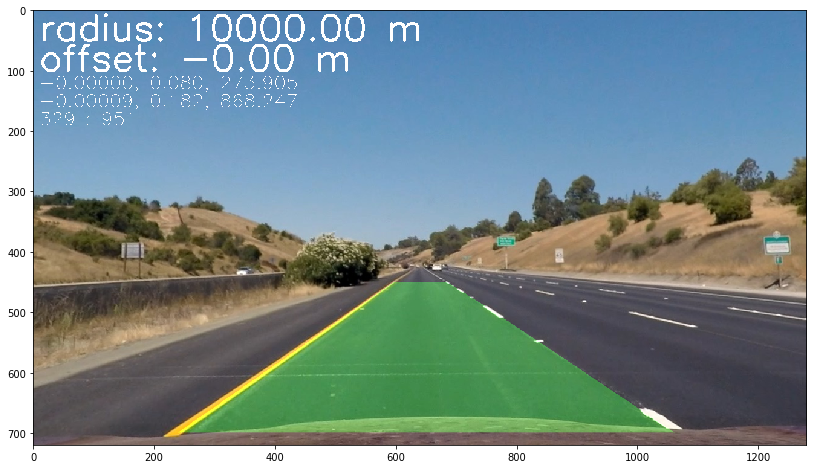

In [42]:
for f in glob.glob('test_images/*.jpg'):
    data.rawImg = cv2.imread(f)
    data.undistImg = cal.process(data.rawImg)
    #data.binaryImg = thr.show(data.undistImg)
    data.binaryImg = thr.process(data.undistImg)
    data.warpedImg = per.process(data.binaryImg)
    lanes.show(data.warpedImg)
    nextLanes.show(data.warpedImg)
    smooth.process(data.warpedImg)
    curve.process(data.warpedImg)
    off.process(data.warpedImg)
    decorate.show(data.undistImg)
    break

In [ ]:
def processor(img):
    data.rawImg = img
    data.undistImg = cal.process(data.rawImg)
    data.binaryImg = thr.process(data.undistImg)
    data.warpedImg = per.process(data.binaryImg)
    if data.curverad is None:
        lanes.process(data.warpedImg)
    nextLanes.process(data.warpedImg)
    smooth.process(data.warpedImg)
    curve.process(data.warpedImg)
    off.process(data.warpedImg)
    return decorate.process(data.undistImg)

#file = 'challenge_video.mp4'
#file = 'harder_challenge_video.mp4'
file = 'project_video.mp4'
clip = VideoFileClip(file)
#clip = clip.subclip(0,5)
processed = clip.fl_image(processor)
processed.write_videofile(file+'.processed.mp4', audio=False)